# <center>ITS307 Data Analytics : Autumn Semester 2022</center>

# <center>Practical 12</center>

# <center>KMean Clustering</center>

![image-14.png](attachment:image-14.png)

# <font color="blue">Table of Contents 
<ol start="0">
<li> Learning Objectives </li>
<li> Train test Split </li>
<li> Train Linear Model</li>
<li> Train Non Linear Model</li>
<li> Train Complex Model </li>
<li> Train Regularized Model</li>
</ol>

## <font color = blue>0. Learning Objectives

Use Kmean algorithm to implement unsupervised clustering for iris dataset.

By the end of the lab, you should be able to :
- Differentiate supervised and unsupervised learning.


- Implement Kmean clustering any given dataset.





## <font color = blue>1. Loading Data

    - Lets load iris dataset for clustering. Note that you don't have to include target for unsupervised learning.
    

In [1]:
#import libraries first
import pandas as pd



In [2]:
#Load datasets
from sklearn.datasets import load_iris
iris = load_iris()


In [3]:
idf = pd.DataFrame(iris.data, columns = iris.feature_names)
idf.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2

## <font color = blue> 2. Data Manipulationa and visualization

In [4]:
#visualize your data here
idf = idf.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1)
idf.head()


petal length (cm)  petal width (cm)
0                1.4               0.2
1                1.4               0.2
2                1.3               0.2
3                1.5               0.2
4                1.4               0.2

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

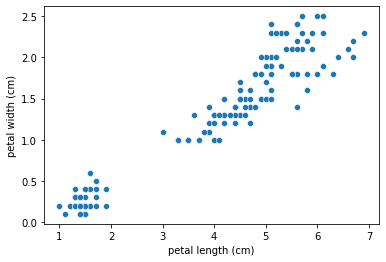

In [5]:
import seaborn as sns
X = idf['petal length (cm)']
Y = idf['petal width (cm)']
sns.scatterplot(X,Y)

## <font color = blue> 3. Train model

In [6]:
#train your model here

from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3)
iris = kmean.fit(idf)
iris

KMeans(n_clusters=3)

## <font color = blue> 4. Explore KMeans attributes

In [7]:
#check Kmean algorithm's attribute

kmean.cluster_centers_


array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

In [8]:
kmean.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## <font color = blue> 5. Prediction

In [9]:
#create sample data to make prediction. Interpret your output for unsupervised clustering

y_pred = kmean.predict([[1.7, 0.4]])
y_pred

C:\Users\USER\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([1])

## <font color = blue> 6. Plotting clusters with their centroids

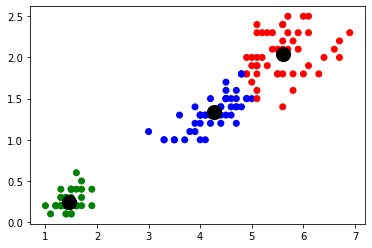

In [21]:
# Plot your datapoints and show the clusters in different colors along with thier cluster centroids.
import numpy as np
import matplotlib.pyplot as plt
colormap = np.array(['r', 'g', 'b'])
X = idf[['petal length (cm)', 'petal width (cm)']]
categories = kmean.predict(X)

plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=colormap[categories])

centers = kmean.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200);



## <font color = blue> 7. Use elbow method to choose K for Kmean

In [25]:
# plot grah to decide K value for given dataset.

import matplotlib.pyplot as plt


In [26]:
distortions = []
K = range(1,18)
print(K)

range(1, 18)


In [29]:
from scipy.spatial.distance import cdist
import math
idf.head()
X = idf.loc[:,['petal length (cm)', 'petal width (cm)']]

In [30]:
for k in K: 
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(X)
    distortions.append(sum(np.min(cdist(X,kmeans_model.cluster_centers_,"euclidean"),axis=1))/X.shape[0])

C:\Users\USER\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [31]:
#printing the distortion
distortions

[1.707364436891335,
 0.583920126422277,
 0.36876646966749166,
 0.2998651974037013,
 0.26508349289751987,
 0.23477391613834805,
 0.21108588339292722,
 0.19710087588990757,
 0.18410484384588674,
 0.17273941654567218,
 0.16351152228505628,
 0.16052261699212475,
 0.15064923595532817,
 0.14373535408937785,
 0.13464220758149725,
 0.13057947215153284,
 0.1267240935804345]

range(1, 18)
0.1267240935804345


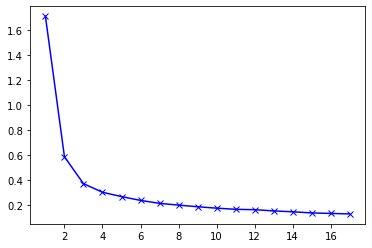

In [32]:
#Plot distortions againt K value
print(K)
# checking for min of K value
print(np.min(distortions))
#Plotting for change in K value
plt.plot(K,distortions,'bx-')